#Table of Content
1. Import
2. Data Analysis
3. Data Preprocessing
4. Model Implementation
5. Sklearn Implementation

#Import

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay ,RocCurveDisplay

In [2]:
from google.colab import files
uploaded = files.upload()

Saving breast-cancer.csv to breast-cancer.csv


In [3]:
df=pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#Data Analysis

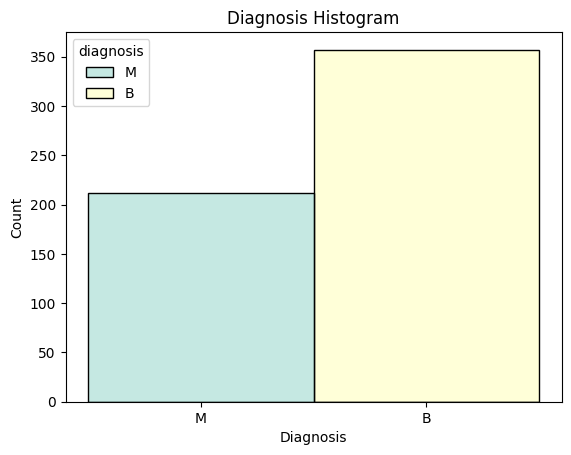

In [4]:
sns.histplot(data=df, x='diagnosis',hue='diagnosis',palette='Set3')
plt.title("Diagnosis Histogram")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

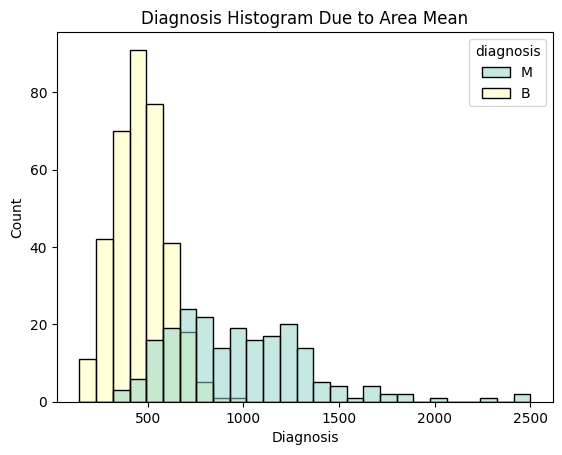

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=df, x='area_mean',hue='diagnosis',palette='Set3')
plt.title("Diagnosis Histogram Due to Area Mean")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

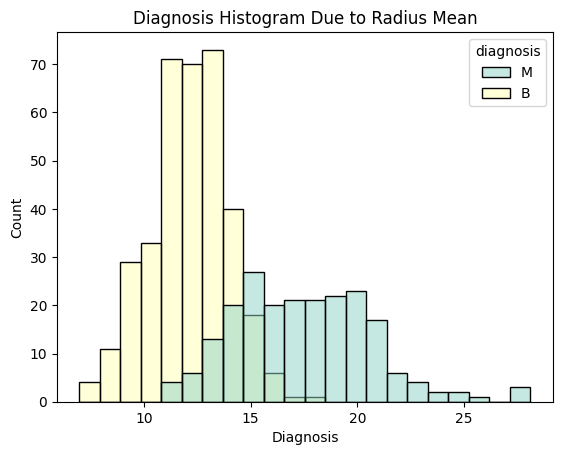

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=df, x='radius_mean',hue='diagnosis',palette='Set3')
plt.title("Diagnosis Histogram Due to Radius Mean")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

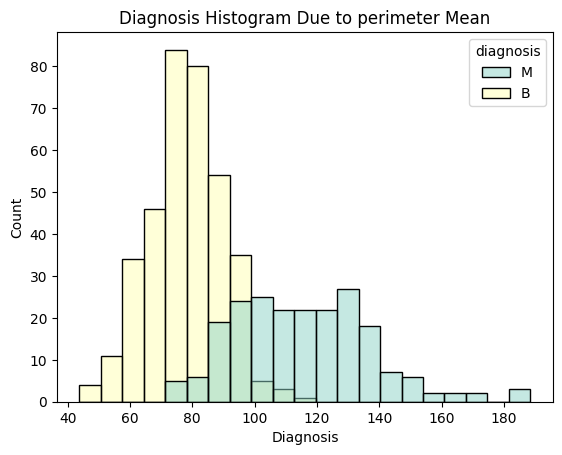

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=df, x='perimeter_mean',hue='diagnosis',palette='Set3')
plt.title("Diagnosis Histogram Due to perimeter Mean")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

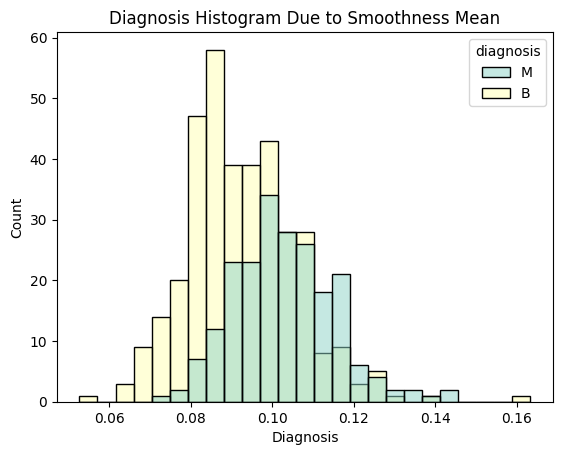

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=df, x='smoothness_mean',hue='diagnosis',palette='Set3')
plt.title("Diagnosis Histogram Due to Smoothness Mean")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

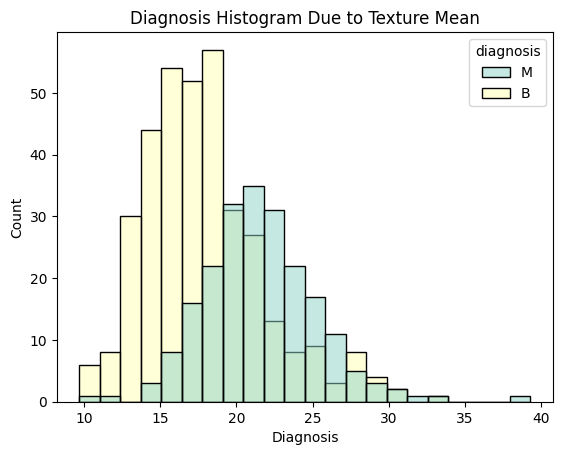

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=df, x='texture_mean',hue='diagnosis',palette='Set3')
plt.title("Diagnosis Histogram Due to Texture Mean")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

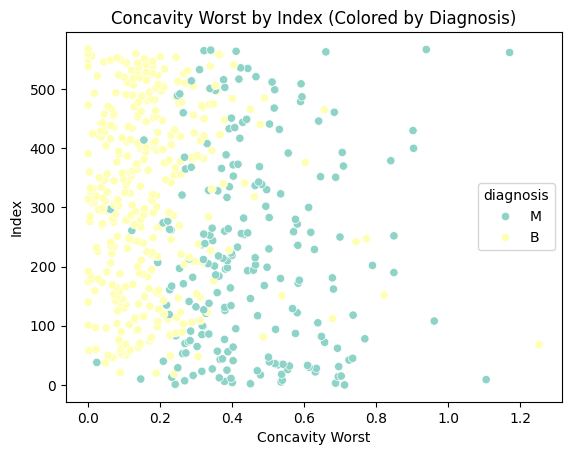

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='concavity_worst', y=df.index, hue='diagnosis', palette='Set3')
plt.title("Concavity Worst by Index (Colored by Diagnosis)")
plt.xlabel("Concavity Worst")
plt.ylabel("Index")
plt.show()

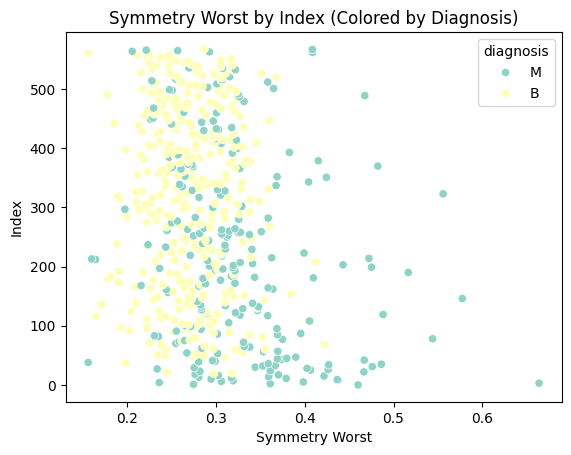

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='symmetry_worst', y=df.index, hue='diagnosis', palette='Set3')
plt.title("Symmetry Worst by Index (Colored by Diagnosis)")
plt.xlabel("Symmetry Worst")
plt.ylabel("Index")
plt.show()

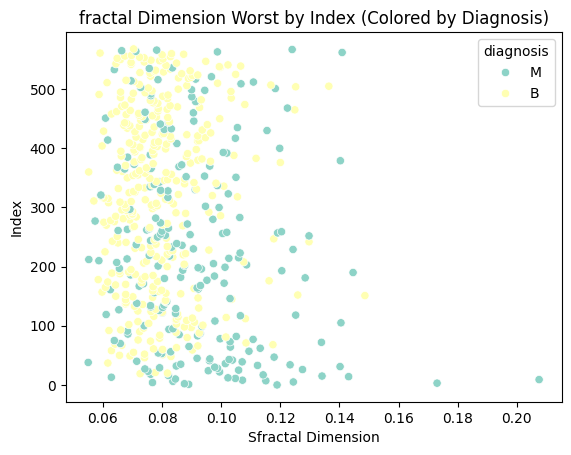

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='fractal_dimension_worst', y=df.index, hue='diagnosis', palette='Set3')
plt.title("fractal Dimension Worst by Index (Colored by Diagnosis)")
plt.xlabel("Sfractal Dimension")
plt.ylabel("Index")
plt.show()

#Data Preprocessing

In [13]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [14]:
#drop unwanted Column
df.drop('id',axis=1,inplace=True)

In [15]:
#Binary Incoding
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


In [17]:
df['diagnosis'].unique()

array([1, 0])

#Get highly correlated features

In [18]:
corr=df.corr()
corr

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


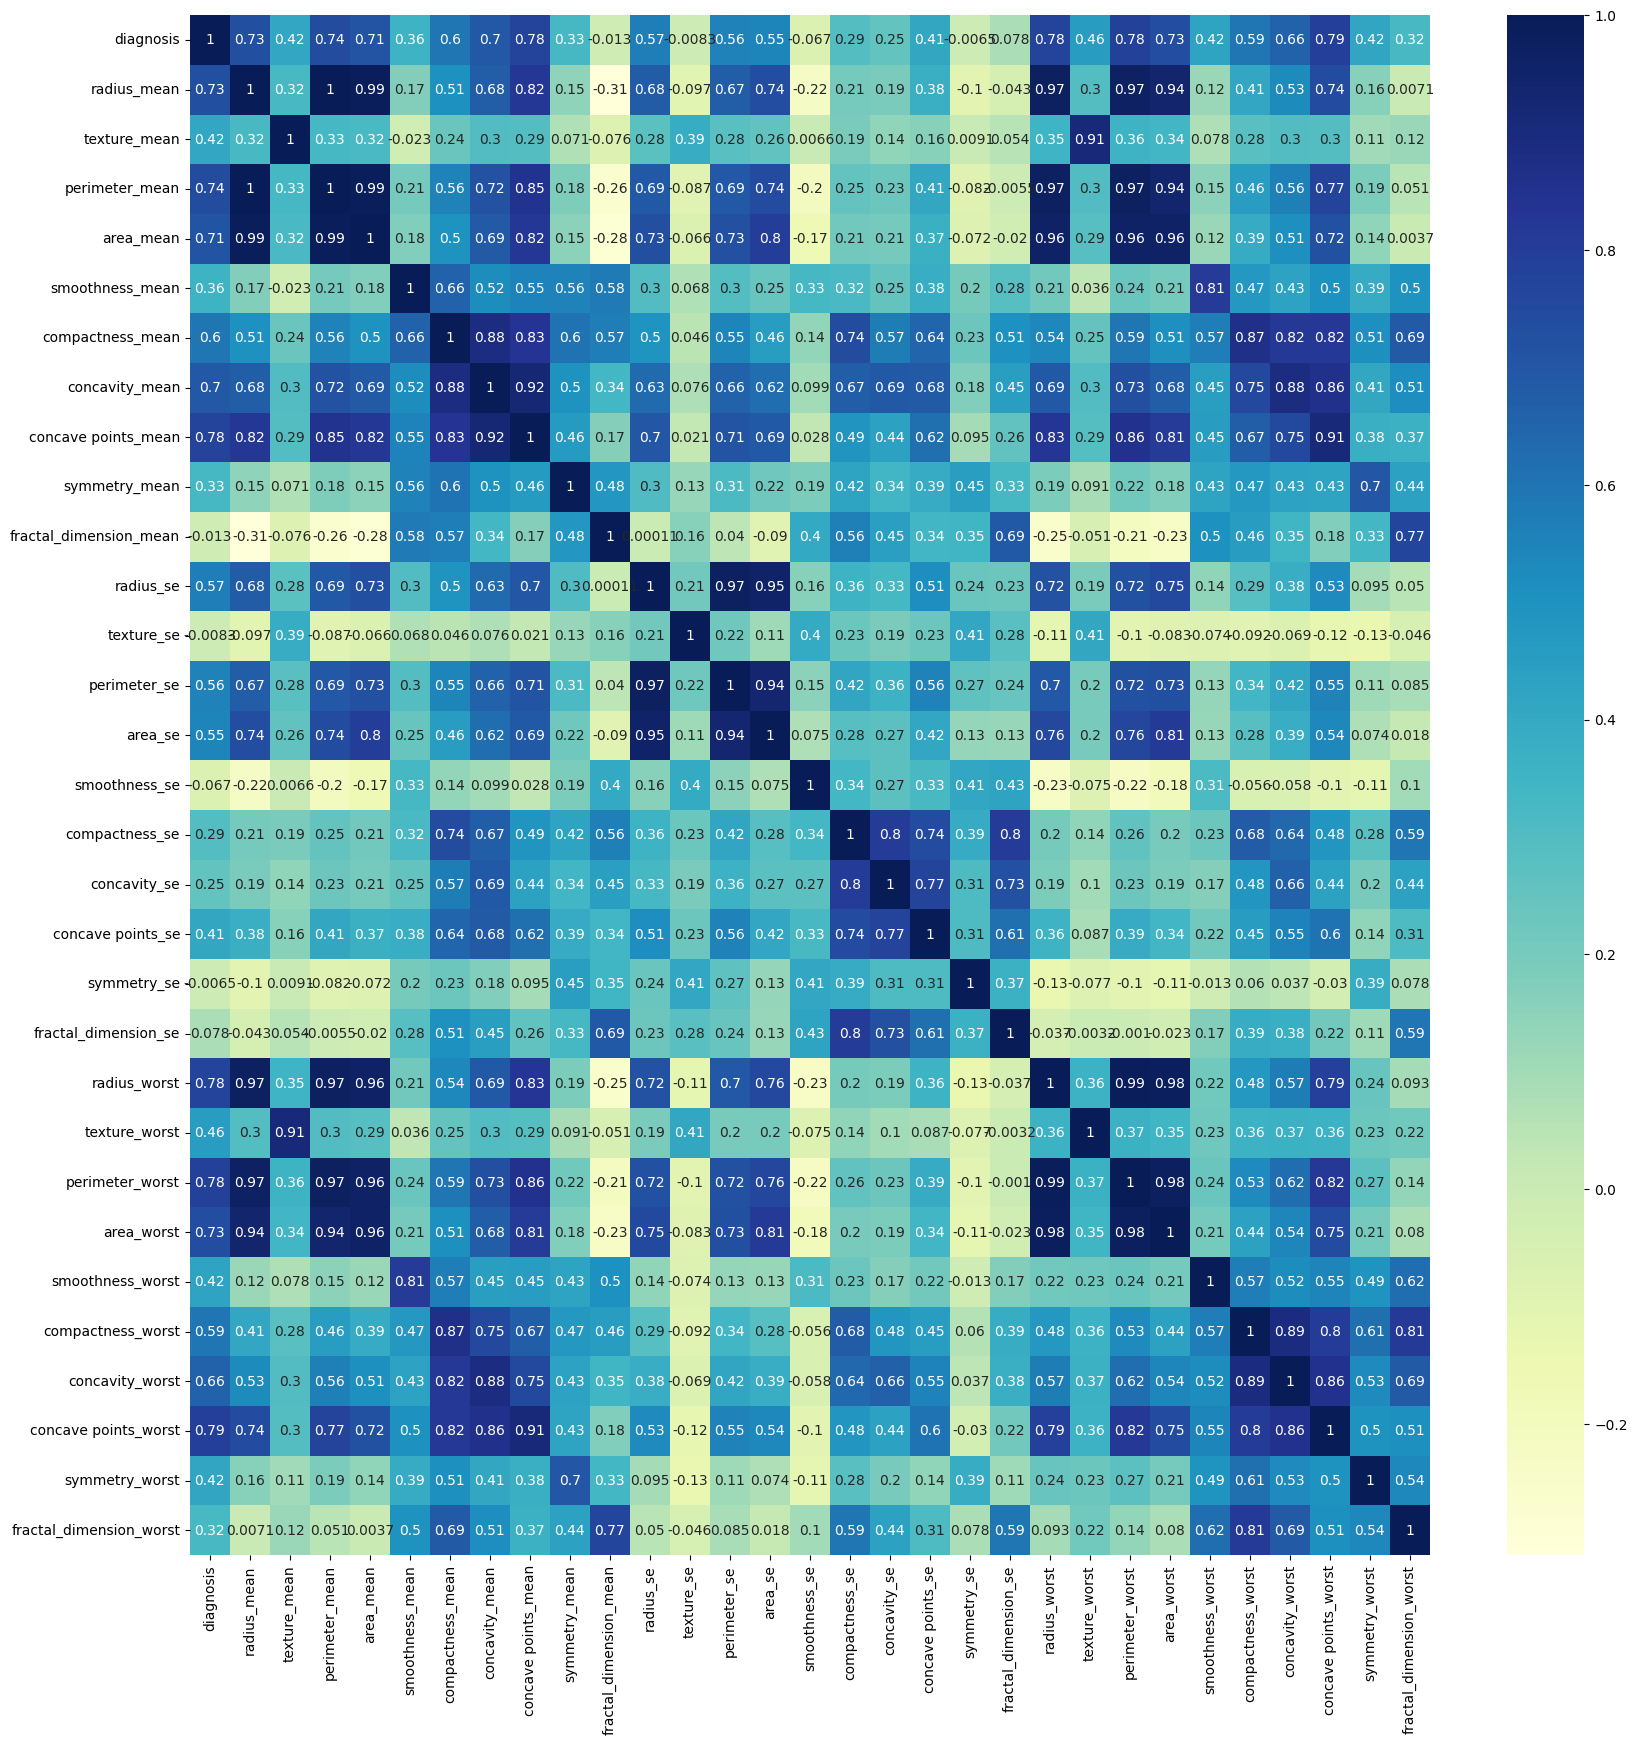

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,cmap='YlGnBu',annot=True)
plt.show()

#Manaul Feature Selection  

In [20]:
cor_Target =abs(corr['diagnosis'])
cor_Target

,diagnosis
diagnosis,1.000000
radius_mean,0.730029
texture_mean,0.415185
perimeter_mean,0.742636
area_mean,0.708984
smoothness_mean,0.358560
compactness_mean,0.596534
concavity_mean,0.696360
concave points_mean,0.776614
symmetry_mean,0.330499


In [21]:
relevant_feature=cor_Target[cor_Target>0.1]

In [22]:
relevant_feature

,diagnosis
diagnosis,1.000000
radius_mean,0.730029
texture_mean,0.415185
perimeter_mean,0.742636
area_mean,0.708984
smoothness_mean,0.358560
compactness_mean,0.596534
concavity_mean,0.696360
concave points_mean,0.776614
symmetry_mean,0.330499


In [49]:
name=[index for index ,value in relevant_feature.items()]
name.remove('diagnosis')
print(name)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'concavity_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


#Assign data and labels

In [27]:
x=df[name].values
y=df['diagnosis']

#Split into train and Testing

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [34]:
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

#Sklearn Implementation

In [35]:
model = SVC(kernel='rbf')
model.fit(X_train_scaled, y_train)

SVC()

In [36]:
y_pred = model.predict(X_test_scaled)

In [43]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9736842105263158


In [44]:
cm= confusion_matrix(y_test, y_pred)
cm

array([[70,  1],
       [ 2, 41]])

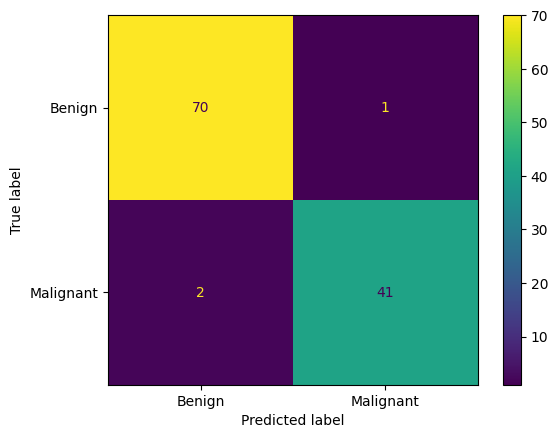

In [45]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
disp.plot()
plt.show()

In [41]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



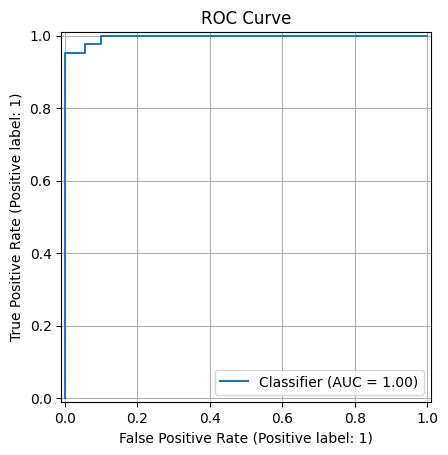

In [52]:
model = SVC(kernel='rbf', probability=True)
model.fit(X_train_scaled, y_train)

# توقع الاحتمالات
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# عرض ROC Curve
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title('ROC Curve')
plt.grid(True)
plt.show()


In [53]:
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc_score)



AUC Score: 0.9963969865705863


In [57]:
# Need to apply svm using Grid search for all parameters

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [0.001, 0.01, 0.1, 1],  # Kernel coefficient
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel type
}

# Create the SVM model
model = SVC()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(x_test)

# Evaluate the model
print(classification_report(y_test, y_pred, digits=4))


Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best parameters found:  {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0     0.9722    0.9859    0.9790        71
           1     0.9762    0.9535    0.9647        43

    accuracy                         0.9737       114
   macro avg     0.9742    0.9697    0.9719       114
weighted avg     0.9737    0.9737    0.9736       114

